## Model Outputs

Previously, you have learnt how to train a model and how to use it for predictions. While that is essential in any data science project, it is not sufficient to just train a model and use it for predictions. This is because even though the model has been trained, we did not evaluate its performance.

The model has to be evaluated against data that was not used to train the model. This is because while the model may perform very well with data that it has trained with, it may not be useful if the model is not able to be used for data that it was not trained with. Thus, in this notebook, we will also learn how to ensure that this does not happen. Before we do so, we have to first understand why a model can perform poorly to unseen data even after training. This could be due to either underfitting or overfitting.

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

### Underfitting Vs Overfitting

Underfitting means that the model is too simplified to be able to explain the data. For example, if you have data that has a non-linear relationship but you are using a linear model to train on, you may suffer from underfitting. This is because the linear model will not be able to explain the non-linear relationship or trend that is observed in the data. Thus, when you use an underfitted model to predict, it will perform poorly.

On the other hand, overfitting means that the model is fitted so well that it has also learnt all the noise or outliers within the dataset. As such, it can perform very well when you test it against data that it has been trained with. However, because it is so well trained, it will not be able to generalise and thus, will not perform well when you are testing it against data that it was not trained with.

Read this [article](https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76) and this [article](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229) for more information about underfitting and overfitting and note down any interesting information in the cell below. While there may be some mathematical equations within the articles, it is ok if you are not able to understand the equations. It is more important to understand the underlying concepts. What is the difference between bias and variance? How do you prevent underfitting? How do you prevent overfitting?

Look at the figures below. If the red line were to be your model and the blue points are the dataset, would the model be overfitting or underfitting?

![Underfit](assets/model1.jpg)

The image above is an example of on underfitted model

![Overfit](assets/model2.jpg)

The image above is an example of an overfitted model

### Balance between underfitting and overfitting

We can see from above that it is important to try and find a balance between underfitting and overfitting. This will allow the model to be accurate but still be able to generalise or perform well on data that it has not been trained in. This means that the model has to be somewhat complex but not too complex. As such, there are some ways that we can try to achieve the balance. We will try some of these methods for the different machine learning techniques that were explored earlier.

### K-Nearest Neighbour

In an earlier notebook, we learnt how to apply the K-Nearest Neighbour (KNN) algorithm to classify data. As a recap, KNN classifies data points based on the majority of the other points that are closest to the point in question. However, in order to use the algorithm, there was a need to input the number of neighbours as a parameter. In the case of underfitting and overfitting, the number of neighbours do play an important role. This is because the number of neighbours determine how likely the model will overfit. The higher the number of neighbours, the less likely the model will overfit. If the number of neighbours is too high, it will be likely for the model to underfit. Thus, there should be some number in between the two extreme numbers that will allow the model to be relatively balanced. This number will differ for different datasets. We will now try to find this number for the Iris Flower dataset.

In [6]:
df = pd.read_csv("datasets/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Now, perform the necessary steps that are required to prepare the data to be processed by a machine learning algroithm. First, extract the features as ``x_values`` and the target variable as ``y_values``. In this case, the ``x_values`` will be "sepal_length", "sepal_width", "petal_length" and "petal_width" whereas the ``y_values`` will be the class. Additionally, remmeber to label encode the ``y_values``. You can encode "Setosa" as 0, "Versicolor" as 1 and "Virginica" as 2.

In [8]:
# dictionary to map class to number
class_to_num = {"Class" : {'Setosa': 1, 'Versicolor': 2, 'Virginica': 3}}

# use replace function to map class to number
df.replace(class_to_num, inplace=True)
print(df["Class"].value_counts())

x_values = df.drop(["Class"], axis=1)
y_values = df["Class"]

1    50
2    50
3    50
Name: Class, dtype: int64


After we are assurred that the data is ready to be processed by a machine learning model, we can now focus on how to balance the overfitting and underfitting issue.

If we want to determine this balance, we will need to be able to evaluate how well the model will perform or how accuracte the model will be if the model were to be applied to data that it has not been trained with. As we do not have future data, we will need to be able to use the current data to perform this evaluation. As such, the current dataset is usually split into 2 different groups. One group will contain all the training data which will be used to train the data. On the other hand, the other group will contain test data that will not be seen or used in the model training phase. The test data will serve as "future" data which will be used to evaluate the model.

In order to split the data into 2 groups, we will use the ``train_test_split`` function from ``sklearn.model_selection``.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.25,random_state=10)

After splitting the data, we now have to standardise or normalise the data. It is always good practice to standardise or normalise any dataset that you use for machine learning. This will help scale the values for all the variables or features into similar ranges. Always remember to conduct the standardisation or normalisation after the data has been split. This is to ensure that the test dataset will always remain unseen by the model and not used in the normalisation or standardisation process of the training data.

In this case, we will choose to use ``StandardScaler`` from ``sklearn.preprocessin``g to standardise the data. Remember to apply the ``.fit_transform`` method to the ``x_train`` data values but only the ``.transform`` method to the ``x_test`` data. Create a variable called ``x_train_scale`` for the train data after standardisation and create another variable called ``x_test_scale`` for the test data after standardisation.

In [10]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

After standardising the data, we can now implement a way to find the optimal number of neighbours for the KNN algorithm. To do so, we will train the KNN algorithm with differnt number of neighbours and also evaluate against the test data. By doing so, we will be able to obtain the accuracy of the KNN model for different number of neighbours. We can then find the number of neighbours that correspond to the highest accuracy. That number will be the optimal number of neighbours.

In [11]:
# Create an empty list to store the accuracy and number of neighbours for each KNN model
accuracy = []
num_neigh = []

# Use ii to cycle through values 1 to 15. This will be the number of neighbours for the KNN classifier. 
for ii in range(1,16):
    # Set number of neighbours to ii
    KNN = KNeighborsClassifier(n_neighbors=ii)
    # Training or fitting the model with the data
    KNN.fit(x_train_scale,y_train)
    # .score provides the accuracy of the model based on the testing data. Store the accuracy into the list.
    accuracy.append(KNN.score(x_test_scale,y_test))
    # Append the number of neighbours to a list
    num_neigh.append(ii)

print(accuracy)

[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 1.0, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9736842105263158, 1.0, 1.0, 1.0, 1.0]


Let us plot the accuracy values on the graph to help us determine the optimal number of neighbours. Try the code below! Remember to import matplotlib.pyplot as plt.

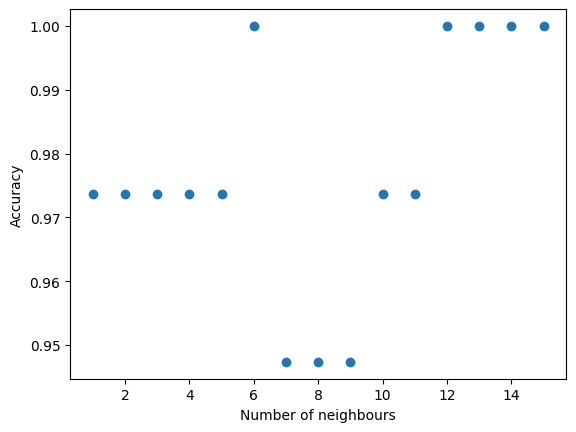

In [12]:
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()

From the graph above, which will be the optimal number of neighbours to use? The optimal number of neighbours is 6. It has the lowest number of neighbours out of all the points with the highest accuracy values.

What we have essentially done now is a form of hyperparameter tuning, here number of neighbours is a hyperparameter that can be set by us and we tried to find the most optimal hyperparameter. 

This technique can be applied to other types of models too!